In [17]:
include("../LogLoss/RealRealHighDimension.jl")
include("./ForecastingMainNew.jl");
using JLD2

Load in the data containing the following:
- X_train_scaled
- y_train
- X_test_scaled
- y_test
- mps
- opts

In [19]:
dloc = "Data/italypower/mps_saves/ipd_legendre_chi60_d12_twoClass.jld2";
f = jldopen(dloc, "r")

JLDFile /Users/joshua/Desktop/QTNML_paper/QuantumInspiredML/Interpolation/paper/italypower/mps_saves/ipd_legendre_chi60_d12_twoClass.jld2 (read-only)
 ├─🔢 X_train_scaled
 ├─🔢 y_train
 ├─🔢 X_test_scaled
 ├─🔢 y_test
 ├─🔢 mps
 └─🔢 opts

This is the current hacky workaround due to the issue with the new opts (which contains an anonymous function for the encoding in the opts struct not being serialized properly). Just load everything else from the JLD2 and reconstruct the opts locally.

In [23]:
setprecision(BigFloat, 128)
Rdtype = Float64

verbosity = 0
test_run = false
track_cost = false

encoding = legendre()
encode_classes_separately = true
train_classes_separately = true

#encoding = Basis("Legendre")
dtype = encoding.iscomplex ? ComplexF64 : Float64
opts=Options(; nsweeps=12, chi_max=60, update_iters=1, verbosity=verbosity, dtype=dtype, loss_grad=loss_grad_KLD,
bbopt=BBOpt("CustomGD"), track_cost=track_cost, eta=0.0025, rescale = (false, true), d=12, aux_basis_dim=2, encoding=encoding, 
encode_classes_separately=encode_classes_separately, train_classes_separately=train_classes_separately)

Options
  nsweeps: Int64 12
  chi_max: Int64 60
  cutoff: Float64 1.0e-10
  update_iters: Int64 1
  verbosity: Int64 0
  dtype: Float64 <: AbstractFloat
  loss_grad: loss_grad_KLD (function of type typeof(loss_grad_KLD))
  bbopt: BBOpt
  track_cost: Bool false
  eta: Float64 0.0025
  rescale: Tuple{Bool, Bool}
  d: Int64 12
  aux_basis_dim: Int64 2
  encoding: Basis
  train_classes_separately: Bool true
  encode_classes_separately: Bool true
  return_encoding_meta_info: Bool false
  minmax: Bool true


In [22]:
X_train_scaled = read(f, "X_train_scaled")
y_train = read(f, "y_train")
X_test_scaled = read(f, "X_test_scaled")
y_test = read(f, "y_test")
mps = read(f, "mps");

In [27]:
fc = load_forecasting_info_variables(mps, X_train_scaled, 
    y_train, X_test_scaled, y_test, opts);

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                         Summary:

 - Dataset has 67 training samples and 1029 testing samples.
 - 2 class(es) was detected. Slicing MPS into individual states...
 - Time independent encoding - Legendre No Norm - detected.
 - d = 12, chi_max = 60

 Created 2 forecastable struct(s) containing class-wise mps and test samples.


# Interpolaton

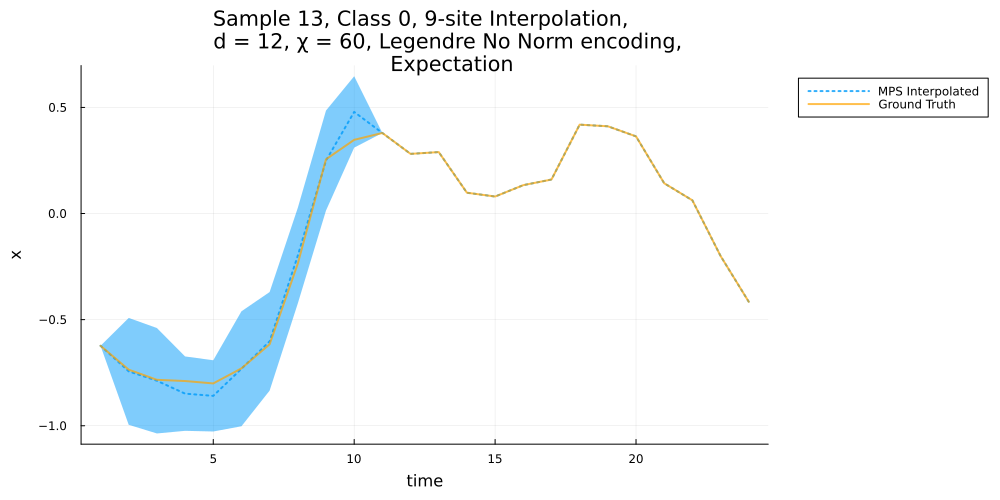

╭────────┬────────────╮
│ Metric │      Value │
├────────┼────────────┤
│  SMAPE │  0.0777838 │
│    MSE │ 0.00288478 │
│   MAPE │  0.0834877 │
│    MAE │  0.0357098 │
│   RMSE │ 0.00288478 │
╰────────┴────────────╯


In [30]:
class = 0
interp_sites = collect(2:1:10)
instance_idx = 13 
any_interpolate_single_time_series(fc, class, instance_idx, interp_sites);

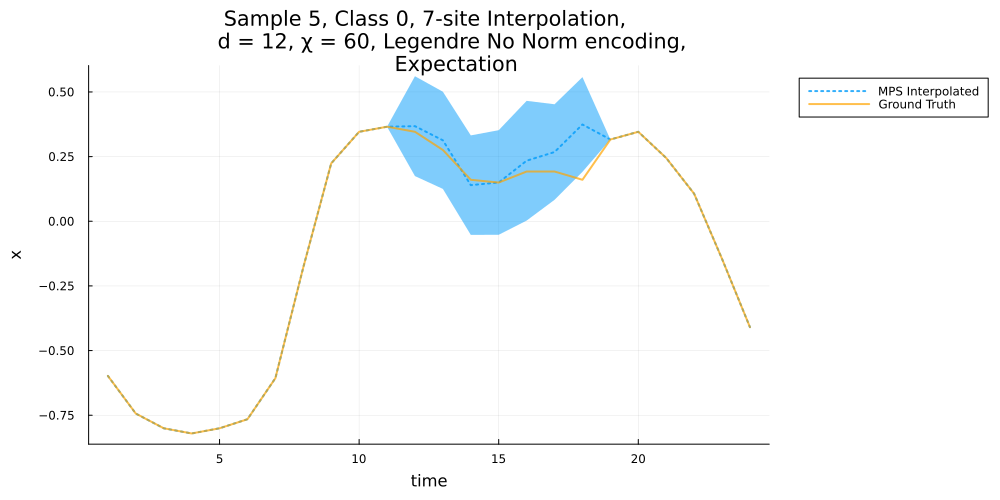

╭────────┬───────────╮
│ Metric │     Value │
├────────┼───────────┤
│  SMAPE │  0.235943 │
│    MSE │ 0.0079194 │
│   MAPE │  0.324547 │
│    MAE │ 0.0587296 │
│   RMSE │ 0.0079194 │
╰────────┴───────────╯


Dict{Symbol, Float64} with 5 entries:
  :SMAPE => 0.235943
  :MSE   => 0.0079194
  :MAPE  => 0.324547
  :MAE   => 0.0587296
  :RMSE  => 0.0079194

In [35]:
class = 0
interp_sites = collect(12:1:18)
instance_idx = 5
any_interpolate_single_time_series(fc, class, instance_idx, interp_sites)

# Forecasting

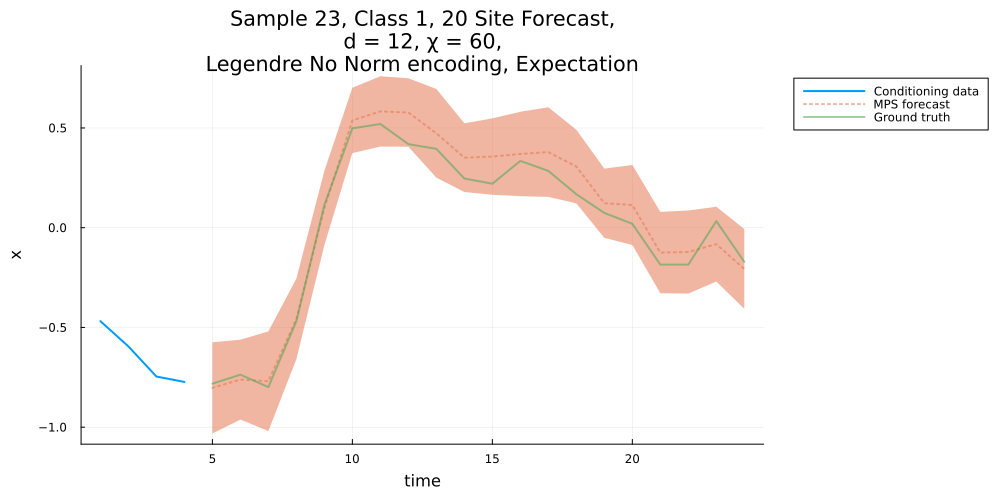

╭────────┬────────────╮
│ Metric │      Value │
├────────┼────────────┤
│  SMAPE │   0.382402 │
│    MSE │ 0.00657435 │
│   MAPE │   0.659854 │
│    MAE │  0.0684209 │
│   RMSE │ 0.00657435 │
╰────────┴────────────╯


Dict{Symbol, Float64} with 5 entries:
  :SMAPE => 0.382402
  :MSE   => 0.00657435
  :MAPE  => 0.659854
  :MAE   => 0.0684209
  :RMSE  => 0.00657435

In [37]:
horizon = 20 # num pts to forecast
idx = 23
class = 1
forward_interpolate_single_time_series(fc, class, idx, horizon)